# ⛑ End-to-end Multi-class Alzheimer classification

This notebook builts an end-to-end mutli-class classifier using various classifier Algorithms in Machine Learning.
## 1.Problem

  Classification of Alzheimer Disease.

## 2.Data

  The data we are using is from Tadpole
    https://tadpole.grand-challenge.org/

## 3.Evaluation
  
  The evaluation is about prediction probabliltes for each class of disease.
    https://tadpole.grand-challenge.org/Data/  
## 4.Features
 some information about the data:
  * we are dealing with text (structured data) so it's probably best we use Machine learning.
  * The data is in five different classes (12741)

   * Cognitively Normal (CN)

   * Early Mild Cognitive Impairment (EMCI)

   * Late Mild Cognitive Impairment (LMCI)

   * Subjective Memory Complaint (SMC)

   * Alzheimer's Disease (AD)


### Importing Datset


In [1]:
import pandas as pd
Alzheimer_dataset=pd.read_csv('/content/drive/MyDrive/Alzheimer_ML/TADPOLE_D1_D2.csv/TADPOLE_D1_D2.csv')
print(Alzheimer_dataset.head(5))

<ipython-input-1-4898e2ea0c94>:2: DtypeWarning: Columns (471,473,474,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,569,570,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,599,601,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,624,625,626,627,628,629,630,631,632,633,634,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735

   RID        PTID VISCODE  SITE  D1  D2 COLPROT ORIGPROT    EXAMDATE DX_bl  \
0    2  011_S_0002      bl    11   1   1   ADNI1    ADNI1  2005-09-08    CN   
1    3  011_S_0003      bl    11   1   0   ADNI1    ADNI1  2005-09-12    AD   
2    3  011_S_0003     m06    11   1   0   ADNI1    ADNI1  2006-03-13    AD   
3    3  011_S_0003     m12    11   1   0   ADNI1    ADNI1  2006-09-12    AD   
4    3  011_S_0003     m24    11   1   0   ADNI1    ADNI1  2007-09-12    AD   

   ...  PHASE_UPENNBIOMK9_04_19_17  BATCH_UPENNBIOMK9_04_19_17  \
0  ...                                                           
1  ...                       ADNI1                 UPENNBIOMK9   
2  ...                                                           
3  ...                       ADNI1                 UPENNBIOMK9   
4  ...                                                           

  KIT_UPENNBIOMK9_04_19_17  STDS_UPENNBIOMK9_04_19_17  \
0                                                       
1            P

#### *Describe Data*

1.Rows and columns of the dataset ✅

2.column names of the dataset ✅

3.Entries of the dataset ✅

In [2]:
# no of rows and columns
Alzheimer_dataset.shape

(12741, 1907)

In [3]:
Alzheimer_dataset.columns

Index(['RID', 'PTID', 'VISCODE', 'SITE', 'D1', 'D2', 'COLPROT', 'ORIGPROT',
       'EXAMDATE', 'DX_bl',
       ...
       'PHASE_UPENNBIOMK9_04_19_17', 'BATCH_UPENNBIOMK9_04_19_17',
       'KIT_UPENNBIOMK9_04_19_17', 'STDS_UPENNBIOMK9_04_19_17',
       'RUNDATE_UPENNBIOMK9_04_19_17', 'ABETA_UPENNBIOMK9_04_19_17',
       'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17',
       'COMMENT_UPENNBIOMK9_04_19_17', 'update_stamp_UPENNBIOMK9_04_19_17'],
      dtype='object', length=1907)

In [4]:
Alzheimer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Columns: 1907 entries, RID to update_stamp_UPENNBIOMK9_04_19_17
dtypes: float64(72), int64(8), object(1827)
memory usage: 185.4+ MB


#### *Preprocess Data*

selecting 28 attributes and removing the null values in the rows ✅

In [5]:
selected_features = ['RID','VISCODE','SITE','AGE','PTGENDER','PTEDUCAT','PTETHCAT',
'PTRACCAT','PTMARRY','Years_bl','CDRSB_bl','ADAS11_bl','ADAS13_bl',
'MMSE_bl','RAVLT_immediate_bl','RAVLT_learning_bl',
'RAVLT_forgetting_bl','RAVLT_perc_forgetting_bl','FAQ_bl','APOE4','Hippocampus_bl','Ventricles_bl',
'WholeBrain_bl','Entorhinal_bl','Fusiform_bl','MidTemp_bl','ICV','DX']
Alzheimer_dataset=Alzheimer_dataset[selected_features]

In [6]:
Alzheimer_dataset.shape

(12741, 28)

In [7]:
Alzheimer_dataset.isnull().sum()

,0
RID,0
VISCODE,0
SITE,0
AGE,0
PTGENDER,0
PTEDUCAT,0
PTETHCAT,0
PTRACCAT,0
PTMARRY,0
Years_bl,0


In [8]:
Alzheimer_dataset=Alzheimer_dataset.dropna()

In [9]:
Alzheimer_dataset.isnull().sum()

,0
RID,0
VISCODE,0
SITE,0
AGE,0
PTGENDER,0
PTEDUCAT,0
PTETHCAT,0
PTRACCAT,0
PTMARRY,0
Years_bl,0


In [10]:
Alzheimer_dataset.shape

(5694, 28)

In [11]:
#import dataset to the local computer
Alzheimer_dataset.to_csv('Alzheimer_dataset.csv')

## Getting our Data ready

In [12]:
# Finding Target value and features
X=Alzheimer_dataset.drop('DX',axis=1)
y=Alzheimer_dataset['DX']

In [13]:
# train and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)

In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4555, 27), (1139, 27), (4555,), (1139,))

## 🐱 Implemenation of Various Classification Algorithms

* Random Forest Classifier -89%

* Decision Tree -85%

* Logistic Regression -85%

* Support Vector Classifier -86%

* Bagging -89%

* XGBoost -90%

* Stacking -89%

* Blending - 88%

 ## Evaluation Metrics

 1. Accuracy

 2. Classification  Report

 3. Confusion Matrix

    A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. Giving an idea of where the model is getting confused.







###### OneHotEncoding

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_feature=['PTGENDER','PTETHCAT','PTRACCAT','PTMARRY','VISCODE']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical_feature)],remainder='passthrough')
transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.65590e+04,
        2.79360e+04, 1.98466e+06],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.55060e+04,
        1.84220e+04, 1.92069e+06],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.55060e+04,
        1.84220e+04, 1.90643e+06],
       ...,
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.94760e+04,
        1.96880e+04, 1.56393e+06],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 2.01760e+04,
        1.93430e+04, 1.64506e+06],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 2.00770e+04,
        2.33310e+04, 1.57966e+06]])

In [16]:
# one Hot Encoded
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.5455,0.0,0.0,8336.0,118233.0,1229740.0,4177.0,16559.0,27936.0,1984660.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0000,10.0,1.0,5319.0,84599.0,1129830.0,1791.0,15506.0,18422.0,1920690.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0000,10.0,1.0,5319.0,84599.0,1129830.0,1791.0,15506.0,18422.0,1906430.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0000,10.0,1.0,5319.0,84599.0,1129830.0,1791.0,15506.0,18422.0,1903820.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0000,10.0,1.0,5319.0,84599.0,1129830.0,1791.0,15506.0,18422.0,1903420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5689,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.4286,0.0,0.0,8697.0,40036.0,1031260.0,3650.0,16239.0,22074.0,1476270.0
5690,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.3333,0.0,0.0,7330.0,15734.0,991574.0,4236.0,22138.0,19106.0,1383090.0
5691,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.1818,0.0,0.0,9252.0,23867.0,1190660.0,3798.0,19476.0,19688.0,1563930.0
5692,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.2727,0.0,0.0,7610.0,39270.0,1112890.0,4181.0,20176.0,19343.0,1645060.0


#### Random Forest Classifier

In [17]:
# from sklearn.ensemble import RandomForestClassifier
# clf=RandomForestClassifier(n_estimators=100)
# clf.fit(X_train,y_train)
# clf.score(X_test,y_test)
# ValueError: could not convert string to float: 'm72' so we are doing One Hot Encoding

In [18]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
rounded_accuracy = round(accuracy,2)
print("Rounded accuracy:", rounded_accuracy)
print("\n")

# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)
# Crosstab
print("\nCrosstab:\n", pd.crosstab(y_test, y_pred,rownames=['Actual Labels'], colnames=['Predictive labels']))
# Classification Report (using the already predicted labels)
print("\n")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8902546093064091
Rounded accuracy: 0.89


Confusion Matrix:
 [[171  14   5   0   0   0]
 [  7 469  11   2   9   2]
 [  8  41   2   0   1   0]
 [  0   8   0   0   0   1]
 [  0   4   0   1 372   2]
 [  0   2   0   1   6   0]]

Crosstab:
 Predictive labels  Dementia  MCI  MCI to Dementia  MCI to NL   NL  NL to MCI
Actual Labels                                                               
Dementia                171   14                5          0    0          0
MCI                       7  469               11          2    9          2
MCI to Dementia           8   41                2          0    1          0
MCI to NL                 0    8                0          0    0          1
NL                        0    4                0          1  372          2
NL to MCI                 0    2                0          1    6          0



Classification Report:
                  precision    recall  f1-score   support

       Dementia       0.92      0.90      0.91     

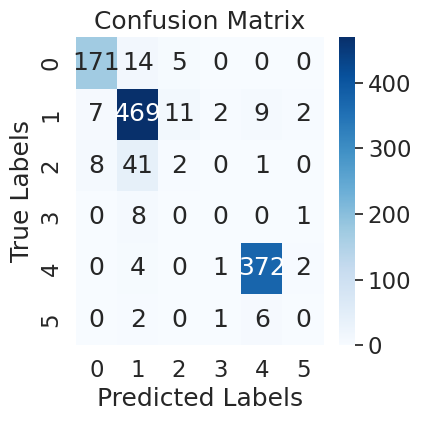

In [19]:
# confusion Matric using sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix # Re-import confusion_matrix

# Set font scale for better readability
sns.set(font_scale=1.5)

# Calculate the confusion matrix (use a different variable name)
cm = confusion_matrix(y_test, y_pred)

# Create the figure and axis for the heatmap
fig, ax = plt.subplots(figsize=(4, 4))

# Create the heatmap, annotate values, and format them as integers
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the title, x-label, and y-label
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# Show the plot
plt.show()

#### Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
np.random.seed(42)

# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(transformed_X,
                                               y,
                                               test_size=0.2)

# Create a Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
rounded_accuracy = round(accuracy,2)
print("Rounded accuracy:", rounded_accuracy)
print("\n")

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8481123792800702
Rounded accuracy: 0.85


                 precision    recall  f1-score   support

       Dementia       0.85      0.83      0.84       190
Dementia to MCI       0.00      0.00      0.00         0
            MCI       0.87      0.89      0.88       500
MCI to Dementia       0.16      0.13      0.15        52
      MCI to NL       0.00      0.00      0.00         9
             NL       0.96      0.94      0.95       379
      NL to MCI       0.00      0.00      0.00         9

       accuracy                           0.85      1139
      macro avg       0.41      0.40      0.40      1139
   weighted avg       0.85      0.85      0.85      1139



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


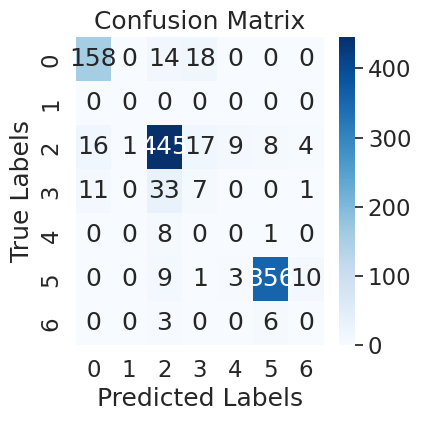

In [21]:
# confusion Matric using sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Set font scale for better readability
sns.set(font_scale=1.5)

# Calculate the confusion matrix (use a different variable name)
cm = confusion_matrix(y_test, y_pred)

# Create the figure and axis for the heatmap
fig, ax = plt.subplots(figsize=(4, 4))

# Create the heatmap, annotate values, and format them as integers
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the title, x-label, and y-label
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# Show the plot
plt.show()

### Logistic Regression

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

np.random.seed(42)
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(transformed_X,
                                               y,
                                               test_size=0.2)

# Feature scaling (if necessary)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a Logistic Regression classifier
lr_clf = LogisticRegression()

# Perform grid search to find optimal hyperparameters
grid_search = GridSearchCV(lr_clf,param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
rounded_accuracy = round(accuracy,2)
print("Rounded accuracy:", rounded_accuracy)
print("\n")

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Accuracy: 0.8498683055311677
Rounded accuracy: 0.85


                 precision    recall  f1-score   support

       Dementia       0.76      0.80      0.78       190
            MCI       0.83      0.89      0.86       500
MCI to Dementia       0.00      0.00      0.00        52
      MCI to NL       0.00      0.00      0.00         9
             NL       0.93      0.98      0.95       379
      NL to MCI       0.00      0.00      0.00         9

       accuracy                           0.85      1139
      macro avg       0.42      0.44      0.43      1139
   weighted avg       0.80      0.85      0.83      1139

[[152  34   4   0   0   0]
 [ 33 445   1   0  20   1]
 [ 14  36   0   0   2   0]
 [  0   8   0   0   1   0]
 [  0   8   0   0 371   0]
 [  0   3   0   0   6   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

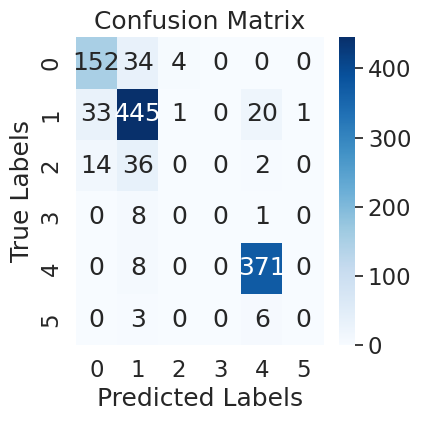

In [23]:
# confusion Matric using sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Set font scale for better readability
sns.set(font_scale=1.5)

# Calculate the confusion matrix (use a different variable name)
cm = confusion_matrix(y_test, y_pred)

# Create the figure and axis for the heatmap
fig, ax = plt.subplots(figsize=(4, 4))

# Create the heatmap, annotate values, and format them as integers
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the title, x-label, and y-label
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# Show the plot
plt.show()

### SVC

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

np.random.seed(42)

# Feature scaling (if necessary)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

# Create an SVM classifier
svm_clf = SVC()

# Perform grid search to find optimal hyperparameters
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model and predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
rounded_accuracy = round(accuracy,2)
print("Rounded accuracy:", rounded_accuracy)
print("\n")

# Print classification report
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.8647936786654961
Rounded accuracy: 0.86


                 precision    recall  f1-score   support

       Dementia       0.82      0.83      0.83       190
            MCI       0.84      0.91      0.87       500
MCI to Dementia       0.00      0.00      0.00        52
      MCI to NL       0.00      0.00      0.00         9
             NL       0.94      0.98      0.96       379
      NL to MCI       1.00      0.11      0.20         9

       accuracy                           0.86      1139
      macro avg       0.60      0.47      0.48      1139
   weighted avg       0.83      0.86      0.84      1139



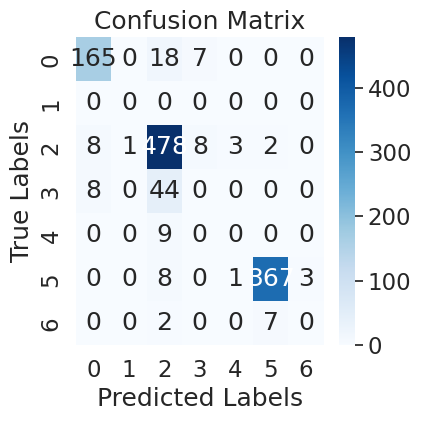

In [27]:
# confusion Matric using sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Set font scale for better readability
sns.set(font_scale=1.5)

# Calculate the confusion matrix (use a different variable name)
cm = confusion_matrix(y_test, y_pred)

# Create the figure and axis for the heatmap
fig, ax = plt.subplots(figsize=(4, 4))

# Create the heatmap, annotate values, and format them as integers
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the title, x-label, and y-label
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# Show the plot
plt.show()

### Bagging

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


np.random.seed(42)
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(transformed_X,
                                               y,
                                               test_size=0.2)

# Create a BaggingClassifier with DecisionTreeClassifier as the base estimator
bagging_classifier = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=42)

# Train the classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
rounded_accuracy = round(accuracy,2)
print("Rounded accuracy:", rounded_accuracy)
print("\n")

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8867427568042142
Rounded accuracy: 0.89


                 precision    recall  f1-score   support

       Dementia       0.91      0.87      0.89       190
Dementia to MCI       0.00      0.00      0.00         0
            MCI       0.86      0.96      0.90       500
MCI to Dementia       0.00      0.00      0.00        52
      MCI to NL       0.00      0.00      0.00         9
             NL       0.98      0.97      0.97       379
      NL to MCI       0.00      0.00      0.00         9

       accuracy                           0.89      1139
      macro avg       0.39      0.40      0.39      1139
   weighted avg       0.85      0.89      0.87      1139



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


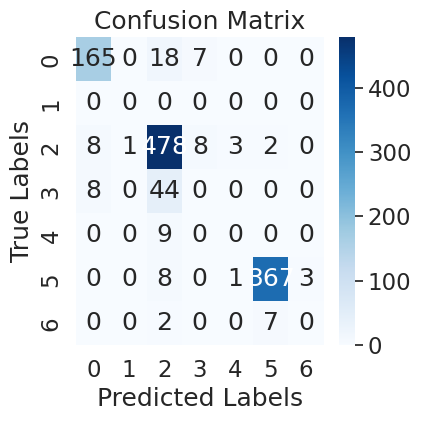

In [28]:
# confusion Matric using sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Set font scale for better readability
sns.set(font_scale=1.5)

# Calculate the confusion matrix (use a different variable name)
cm = confusion_matrix(y_test, y_pred)

# Create the figure and axis for the heatmap
fig, ax = plt.subplots(figsize=(4, 4))

# Create the heatmap, annotate values, and format them as integers
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the title, x-label, and y-label
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# Show the plot
plt.show()

### XGBoost (eXtreme Gradient Boosting)

In [29]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Set a random seed for reproducibility (optional)
np.random.seed(42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the testing labels using the same encoder
y_test_encoded = label_encoder.transform(y_test)

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()  # You can adjust parameters like learning_rate, n_estimators, max_depth

# Train the classifier using encoded labels
xgb_classifier.fit(X_train, y_train_encoded)

# Make predictions on the test set (using encoded labels)
y_pred_encoded = xgb_classifier.predict(X_test)

# Decode predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
rounded_accuracy = round(accuracy,2)
print("Rounded accuracy:", rounded_accuracy*100)
print("\n")

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.897278314310799
Rounded accuracy: 90.0


                 precision    recall  f1-score   support

       Dementia       0.91      0.89      0.90       190
Dementia to MCI       0.00      0.00      0.00         0
            MCI       0.89      0.96      0.92       500
MCI to Dementia       0.17      0.08      0.11        52
      MCI to NL       0.00      0.00      0.00         9
             NL       0.99      0.97      0.98       379
      NL to MCI       0.00      0.00      0.00         9

       accuracy                           0.90      1139
      macro avg       0.42      0.41      0.42      1139
   weighted avg       0.88      0.90      0.89      1139



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


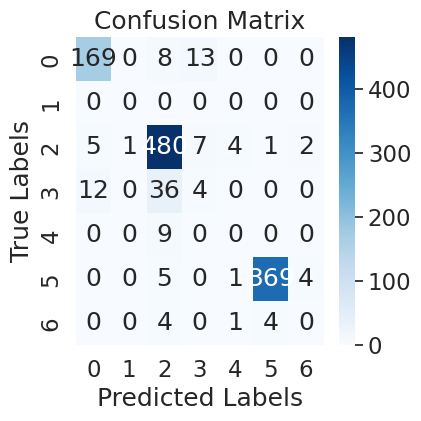

In [30]:
# confusion Matric using sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Set font scale for better readability
sns.set(font_scale=1.5)

# Calculate the confusion matrix (use a different variable name)
cm = confusion_matrix(y_test, y_pred)

# Create the figure and axis for the heatmap
fig, ax = plt.subplots(figsize=(4, 4))

# Create the heatmap, annotate values, and format them as integers
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the title, x-label, and y-label
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# Show the plot
plt.show()

### Stacking

In [31]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LabelEncoder for features
label_encoder_X = LabelEncoder()

# Iterate through columns and encode string features
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = label_encoder_X.fit_transform(X_train[col])
        X_test[col] = label_encoder_X.transform(X_test[col])  # Use same encoder for test data

# Define base models
base_models = [
    ('lr', LogisticRegression()),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier())
]

# Create a meta-model (e.g., Logistic Regression)
meta_model = LogisticRegression()

# Create a StackingClassifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
rounded_accuracy = round(accuracy,2)
print("Rounded accuracy:", rounded_accuracy)
print("\n")

# Print classification report
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Accuracy: 0.8884986830553117
Rounded accuracy: 0.89


                 precision    recall  f1-score   support

       Dementia       0.90      0.86      0.88       190
            MCI       0.84      0.96      0.90       500
MCI to Dementia       0.00      0.00      0.00        52
      MCI to NL       0.00      0.00      0.00         9
             NL       0.95      0.97      0.96       379
      NL to MCI       0.00      0.00      0.00         9

       accuracy                           0.89      1139
      macro avg       0.45      0.47      0.46      1139
   weighted avg       0.84      0.89      0.86      1139



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


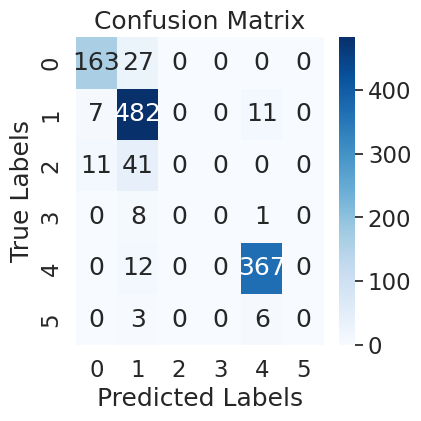

In [32]:
# confusion Matric using sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Set font scale for better readability
sns.set(font_scale=1.5)

# Calculate the confusion matrix (use a different variable name)
cm = confusion_matrix(y_test, y_pred)

# Create the figure and axis for the heatmap
fig, ax = plt.subplots(figsize=(4, 4))

# Create the heatmap, annotate values, and format them as integers
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the title, x-label, and y-label
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# Show the plot
plt.show()

### Blending

In [33]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Assuming you have your data loaded into X (features) and y (target variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through columns and encode string features
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = label_encoder.fit_transform(X_train[col])
        X_test[col] = label_encoder.transform(X_test[col]) # Use the same encoder for test data

# Define base models
base_models = [
    ('lr', LogisticRegression()),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier())
]

# Create a meta-model (e.g., Logistic Regression)
meta_model = LogisticRegression()

# Create a StackingClassifier (blending)
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
rounded_accuracy = round(accuracy, 2)
print("Rounded accuracy:", rounded_accuracy)
print("\n")

# Print classification report
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Accuracy: 0.8805970149253731
Rounded accuracy: 0.88


                 precision    recall  f1-score   support

       Dementia       0.84      0.87      0.85       190
            MCI       0.85      0.94      0.89       500
MCI to Dementia       0.00      0.00      0.00        52
      MCI to NL       0.00      0.00      0.00         9
             NL       0.94      0.97      0.96       379
      NL to MCI       0.00      0.00      0.00         9

       accuracy                           0.88      1139
      macro avg       0.44      0.46      0.45      1139
   weighted avg       0.83      0.88      0.85      1139



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


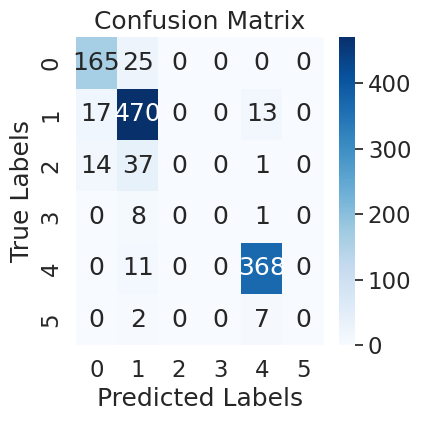

In [34]:
# confusion Matric using sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Set font scale for better readability
sns.set(font_scale=1.5)

# Calculate the confusion matrix (use a different variable name)
cm = confusion_matrix(y_test, y_pred)

# Create the figure and axis for the heatmap
fig, ax = plt.subplots(figsize=(4, 4))

# Create the heatmap, annotate values, and format them as integers
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the title, x-label, and y-label
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# Show the plot
plt.show()